# Import Libraries and Load Datasets

First, we imported libraries including **Pandas** (loading datasets), **Numpy** (matrix manipulation), **Matplotlib** and **Seaborn** (visualization), and **Sklearn** (building classifiers).

In [163]:
import warnings
warnings.filterwarnings('ignore')

# Data wrangling & pre-processing
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('classic')

# Model validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, roc_auc_score, precision_score, f1_score, recall_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Cross validation
from sklearn.model_selection import StratifiedKFold

from scipy import stats

In [104]:
#Load heart disease dataset
df_heart_disease = pd.read_csv('heart_disease_missing.csv') 
df_heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,76,0,2,140.102822,197.105970,0,2.0,115.952071,0,1.284822,1.0,0,2.175904,1
1,43,0,0,132.079599,341.049462,1,0.0,135.970028,1,3.110483,1.0,0,3.082071,0
2,47,1,2,107.899290,242.822816,0,1.0,152.210039,0,-0.023723,2.0,0,2.020827,0
3,51,1,2,99.934001,NaN,0,1.0,143.049207,1,1.195082,1.0,0,2.100312,1
4,57,1,0,110.103508,334.952353,0,1.0,143.099327,1,3.082052,1.0,1,2.831509,0


# Data Cleaning

In the heart disease dataset the minimum value for the **oldpeak** is negative which is not acceptable. Therefore, we filtered our data based on the oldpeak positive values. Moreover, after checking the data we found out that there are **no duplicate** values in the dataset but there is a need for feature type conversion after checking the type of each feature in the dataset.

In [123]:
#Display basic info about data type
df_heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
age         212 non-null int64
sex         212 non-null int64
cp          212 non-null int64
trestbps    205 non-null float64
chol        202 non-null float64
fbs         212 non-null int64
restecg     207 non-null float64
thalach     208 non-null float64
exang       212 non-null int64
oldpeak     200 non-null float64
slope       210 non-null float64
ca          212 non-null int64
thal        211 non-null float64
target      212 non-null int64
dtypes: float64(7), int64(7)
memory usage: 23.3 KB


In [124]:
#Look at the number of rows and columns
df_heart_disease.shape

(212, 14)

In [125]:
#Display stats about data
df_heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,212.000000,212.000000,212.000000,205.000000,202.000000,212.000000,207.000000,208.000000,212.000000,200.000000,210.000000,212.000000,211.000000,212.000000
mean,54.311321,0.688679,0.957547,131.784610,244.133256,0.132075,0.560386,149.647978,0.344340,1.113106,1.423810,0.731132,2.349112,0.542453
std,9.145339,0.464130,1.022537,18.057222,46.444257,0.339374,0.535149,22.076206,0.476277,1.255908,0.623622,1.038762,0.602117,0.499374
min,29.000000,0.000000,0.000000,93.944184,126.085811,0.000000,0.000000,88.032613,0.000000,-0.185668,0.000000,0.000000,0.858554,0.000000
25%,47.000000,0.000000,0.000000,119.968114,211.969594,0.000000,0.000000,135.946808,0.000000,0.050778,1.000000,0.000000,1.949795,0.000000
50%,55.000000,1.000000,1.000000,130.010256,241.467023,0.000000,1.000000,151.939216,0.000000,0.726060,1.000000,0.000000,2.078759,1.000000
75%,61.000000,1.000000,2.000000,139.965470,272.484222,0.000000,1.000000,165.260092,1.000000,1.816733,2.000000,1.000000,2.970842,1.000000
max,77.000000,1.000000,3.000000,192.020200,406.932689,1.000000,2.000000,202.138041,1.000000,6.157114,2.000000,4.000000,3.277466,1.000000


In [126]:
#Replace the null values with 0 for oldpeak feature
df_heart_disease = df_heart_disease.fillna({
    'oldpeak':0  
})

In [127]:
#Remove the negative values of oldpeak
df_heart_disease_cleaned_1 = df_heart_disease[df_heart_disease.oldpeak >= 0]
#Replace 0 values with NaN in oldpeak column
df_heart_disease_cleaned_1['oldpeak'] = df_heart_disease_cleaned_1['oldpeak'].replace(0, np.nan)
df_heart_disease_cleaned_1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,76,0,2,140.102822,197.105970,0,2.0,115.952071,0,1.284822,1.0,0,2.175904,1
1,43,0,0,132.079599,341.049462,1,0.0,135.970028,1,3.110483,1.0,0,3.082071,0
3,51,1,2,99.934001,NaN,0,1.0,143.049207,1,1.195082,1.0,0,2.100312,1
4,57,1,0,110.103508,334.952353,0,1.0,143.099327,1,3.082052,1.0,1,2.831509,0
6,63,0,2,134.926653,252.023252,0,0.0,171.840974,0,0.106792,2.0,0,1.903701,1


In [128]:
#Display stats about data
df_heart_disease_cleaned_1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,174.000000,174.000000,174.000000,167.000000,165.000000,174.000000,171.000000,171.000000,174.000000,162.000000,172.000000,174.000000,174.000000,174.000000
mean,54.833333,0.689655,0.913793,132.479825,243.171751,0.120690,0.567251,147.174359,0.379310,1.391235,1.325581,0.821839,2.393746,0.482759
std,9.187881,0.463970,1.041639,18.027274,47.290552,0.326706,0.542199,22.227521,0.486616,1.240721,0.629524,1.089830,0.617791,0.501145
min,29.000000,0.000000,0.000000,93.954213,126.085811,0.000000,0.000000,88.032613,0.000000,0.001762,0.000000,0.000000,0.858554,0.000000
25%,48.000000,0.000000,0.000000,119.968861,212.015656,0.000000,0.000000,132.076992,0.000000,0.278047,1.000000,0.000000,1.970026,0.000000
50%,56.000000,1.000000,0.000000,130.018419,240.128242,0.000000,1.000000,148.061323,0.000000,1.203428,1.000000,0.000000,2.142010,0.000000
75%,62.000000,1.000000,2.000000,140.078785,269.956848,0.000000,1.000000,163.033886,1.000000,2.050493,2.000000,1.000000,2.984215,1.000000
max,77.000000,1.000000,3.000000,180.118809,406.932689,1.000000,2.000000,202.138041,1.000000,6.157114,2.000000,4.000000,3.277466,1.000000


In the dataset we have 7, 9, 3, 3, 12, and 2 missing values in the trestbps, chol, restecg, thalach, oldpeak, and slope columns respectively. We filled out the float variables such as trestbps, chol, thalach, and oldpeak with their associated mean value; 132.479825, 243.171751, 147.174359, and 1.391235. However, I droped the NaN values for the categorical variables.

In [129]:
#Check for null values
df_heart_disease_cleaned_1.isnull().sum()

age          0
sex          0
cp           0
trestbps     7
chol         9
fbs          0
restecg      3
thalach      3
exang        0
oldpeak     12
slope        2
ca           0
thal         0
target       0
dtype: int64

In [130]:
#Replace the null values with the mean of the attributes
df_heart_disease_cleaned_2 = df_heart_disease_cleaned_1.fillna({
    'trestbps':132.479825,
    'chol':243.171751,
    'thalach':147.174359,
    'oldpeak':1.391235    
})
df_heart_disease_cleaned_2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,76,0,2,140.102822,197.105970,0,2.0,115.952071,0,1.284822,1.0,0,2.175904,1
1,43,0,0,132.079599,341.049462,1,0.0,135.970028,1,3.110483,1.0,0,3.082071,0
3,51,1,2,99.934001,243.171751,0,1.0,143.049207,1,1.195082,1.0,0,2.100312,1
4,57,1,0,110.103508,334.952353,0,1.0,143.099327,1,3.082052,1.0,1,2.831509,0
6,63,0,2,134.926653,252.023252,0,0.0,171.840974,0,0.106792,2.0,0,1.903701,1


In [131]:
#Checking for the duplicate values
df_heart_disease_cleaned_2.drop_duplicates(keep='first').shape 

(174, 14)

Based on the dataset description the variable "Thal" can only obtain the values 0 = NA, 1 = Fixed defect, 2 = Normal, and 3 = Reversible defect. However, there seems to be some noise in the "thal" column of the iris dataset as the values are float numbers. To remove this noise we used the **floor** function in the numpy library to obtain integer values. 

In [132]:
#Use floor function to remove the noise in Thal variable
df_heart_disease_cleaned_2['thal'] = df_heart_disease_cleaned_2['thal'].apply(np.floor).astype('int64')
#Drop NaN values for Slope and Restecg
df_heart_disease_cleaned_2 = df_heart_disease_cleaned_2.dropna()
#Change the data type of our columns in the heart disease dataset 
df_heart_disease_cleaned_2['restecg'] = df_heart_disease_cleaned_2['restecg'].astype('int64')
df_heart_disease_cleaned_2['slope'] = df_heart_disease_cleaned_2['slope'].astype('int64')
df_heart_disease_cleaned_2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,76,0,2,140.102822,197.105970,0,2,115.952071,0,1.284822,1,0,2,1
1,43,0,0,132.079599,341.049462,1,0,135.970028,1,3.110483,1,0,3,0
3,51,1,2,99.934001,243.171751,0,1,143.049207,1,1.195082,1,0,2,1
4,57,1,0,110.103508,334.952353,0,1,143.099327,1,3.082052,1,1,2,0
6,63,0,2,134.926653,252.023252,0,0,171.840974,0,0.106792,2,0,1,1


After cleaning the dataset and determining the right variable type for each feature, we substituted the integer values of categorical variables with their relative value, and used that dataframe for plotting the pairplot and correlation matrix.

In [133]:
#Change the data type of our columns in the heart disease dataset 
df_heart_disease_cleaned_3 = df_heart_disease_cleaned_2[:]
df_heart_disease_cleaned_3.cp = df_heart_disease_cleaned_3.cp.replace({0:'Asympt.', 1:'Atypical', 2:'Non', 3:'Typical'})
df_heart_disease_cleaned_3.restecg = df_heart_disease_cleaned_3.restecg.replace({0:'LV hyper', 1:'Normal', 2:'ST-T wave'})
df_heart_disease_cleaned_3.slope = df_heart_disease_cleaned_3.slope.replace({0:'down', 1:'up', 2:'flat'})
df_heart_disease_cleaned_3.thal = df_heart_disease_cleaned_3.thal.replace({0:'NA', 1:'Fixed', 2:'Normal', 3:'Revers.'})

To detect any potential outlier in the dataset we ploted a box and whiskers plot. Then we computed the **z-score** for numeric columns and defined the threshold for filtering the outliers. It seems that we have three outliers in our dataset one for **trestbps**, and two others for **thalach**. Therefore, we removed those three data points from the data.

In [134]:
#Define numeric features
numeric_features = ['age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak', 'exang', 'ca']
EDA_numeric_features = df_heart_disease_cleaned_2.loc[:,numeric_features]

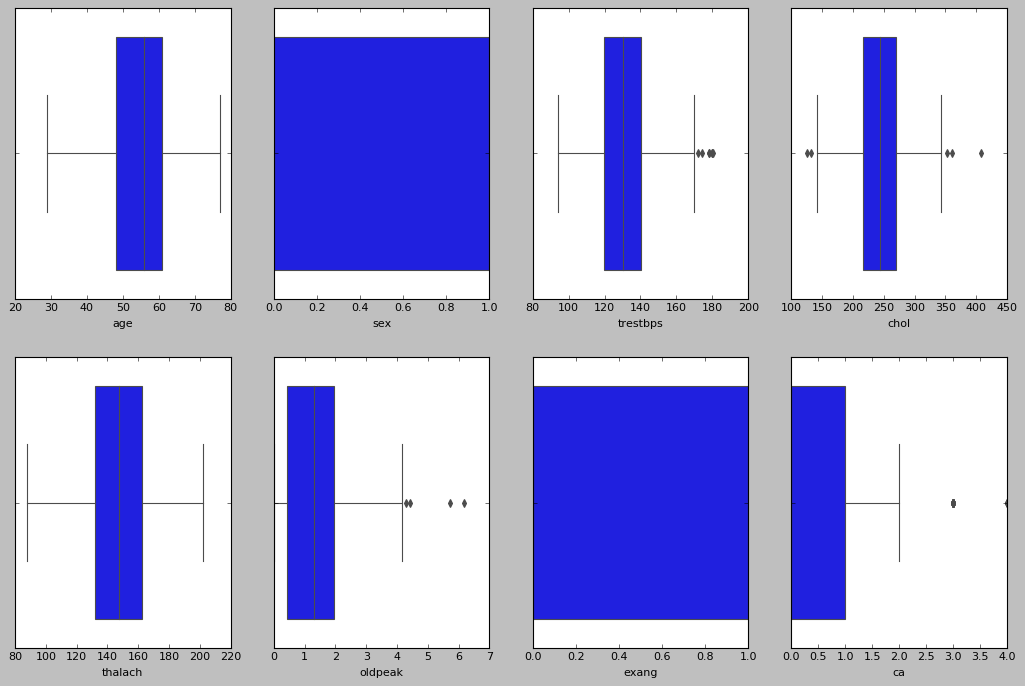

In [135]:
#Box and whiskers plot for detecting the outliers
plt.figure(figsize=(16,10))

for i in range(len(EDA_numeric_features.columns)):
    plt.subplot(2,4,i + 1)
    sns.boxplot(EDA_numeric_features[EDA_numeric_features.columns[i]])

In [136]:
# Filtering numeric features such as age, oldpeak, trestbps, chol, thalach, ca for outlier detection
df_heart_disease_cleaned_2_numeric = df_heart_disease_cleaned_2[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']]

In [137]:
# Calculating zscore of numeric columns in the dataset
z = np.abs(stats.zscore(df_heart_disease_cleaned_2_numeric))

In [138]:
# Defining threshold for filtering outliers
threshold = 3
np.where(z>3)

(array([105, 141, 151]), array([4, 4, 2]))

In [139]:
# Filtering outliers retaining only those data points which are below threshold
df_heart_disease_cleaned_2 = df_heart_disease_cleaned_2[(z<3).all(axis=1)]

To explore how our different data cleaning approaches impacted on the classification performance, we compared the **accuracy** of our model when dropping NaN values with replacing NaN values for the Iris dataset, and also compared the accuracy of our model when replacing the null values with the mean of the numeric attributes in the heart disease dataset instead of dropping them. Moreover, we compared the accuracy of our model for heart disease dataset when selecting the subset of features with the accuracy of our model without feature selection.



The accuracy for different scenarios are as follows:



-Heart disease with all of the features:0.84\
-Heart disease with only subset of features:0.78



-Hear disease replace NaN with mean:0.78\
-Heart disease drop NaN:0.75



Therefore, for the heart disease dataset the accuracy improved by using the **full features** and **replacing NaN values with the mean** for categorical variables.

# Feature Selection

For this part of our ayanlysis we made scatterplots of all-paired attributes by using **seaborn's pairplot** function.

To choose our 5 subset of features we selected those features that significantly highlighted the diference between heart disease patients and normal patients. In this regard we plotted a **pairplot** to study the relationship between our **numerical features** with regard to the target, and also plotted **histograms** to examine the relationship between our **categorical features** and our target variable.

From the below pairplot we couldn't obtain many useful information. So, let's look at age and sex of the poeple's who are suffering and not suffering from the heart disease. **Here, target = 1 implies that the person is suffering from heart disease and target = 0 implies the person is not suffering**.

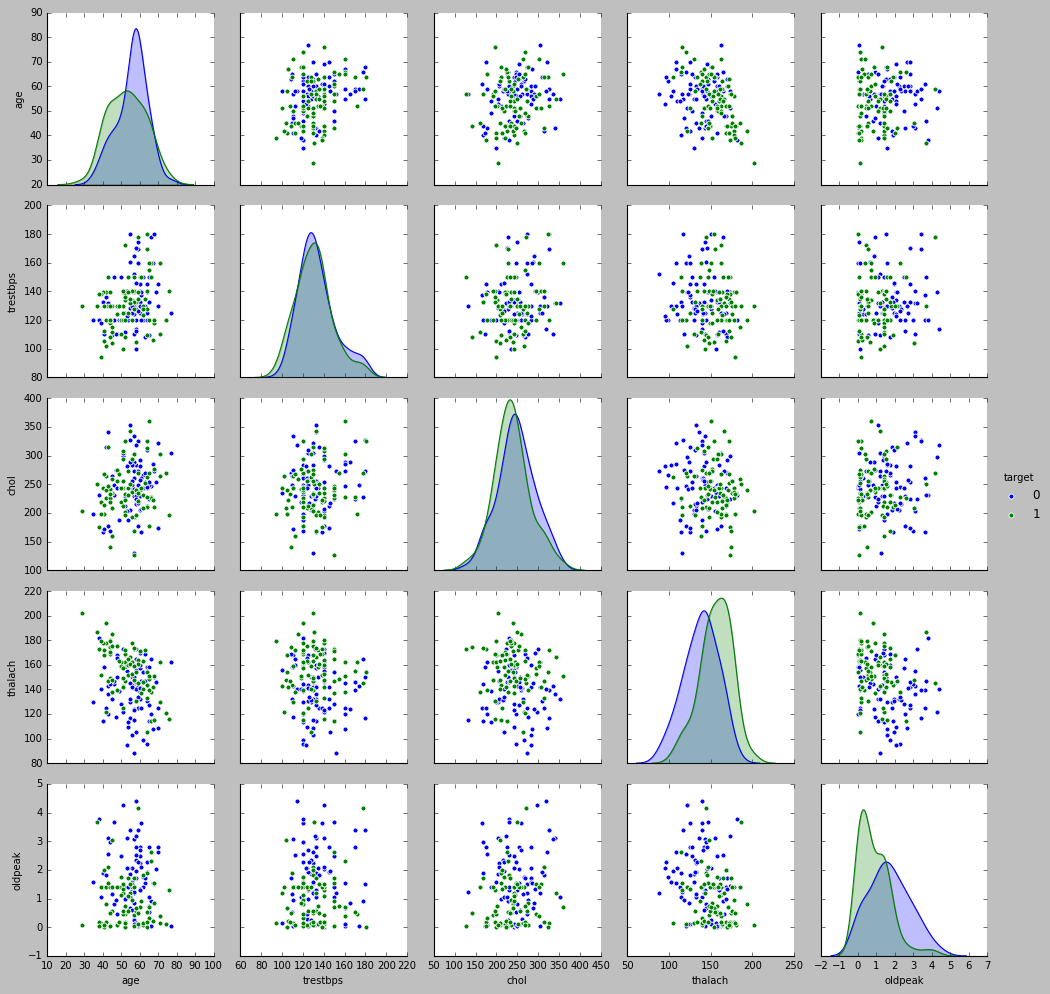

In [143]:
#Creating the pairplot for heart disease dataset
sns.pairplot(df_heart_disease_cleaned_2, hue = 'target', vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] );
plt.rcParams.update({'font.size': 9})

From the below figures we understood that **age** is one of the significant factors showing the probability that whether a person suffers from the heart disease or not. Majorly people belonging to the age group of 50+ are suffering from the heart disease.

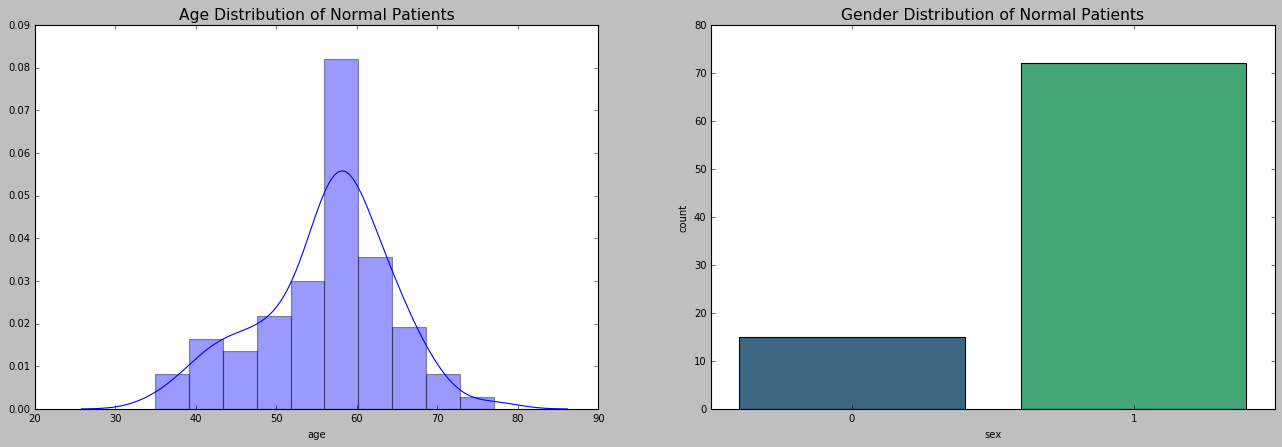

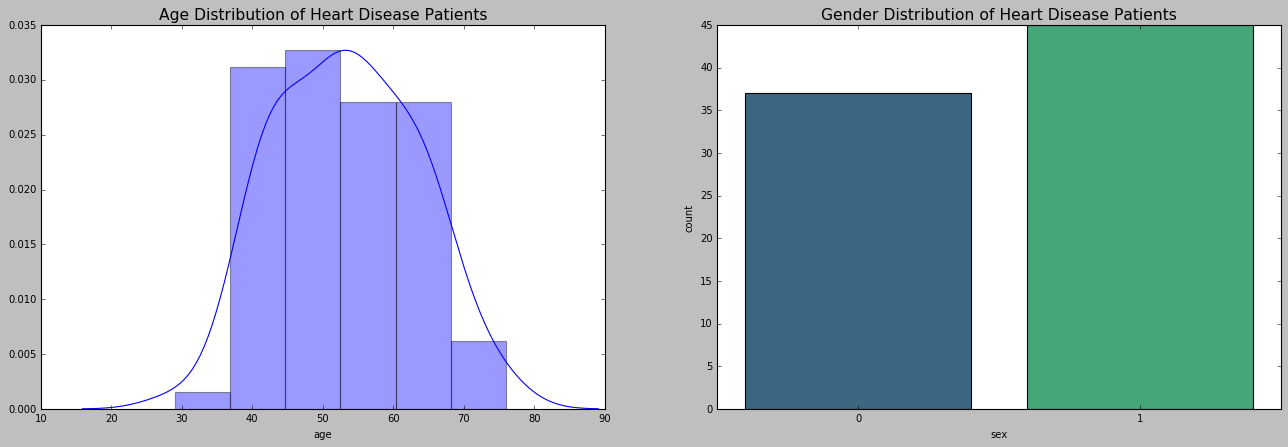

In [145]:
# creating separate dataframe for normal and heart disease patients

df_1=df_heart_disease_cleaned_3[df_heart_disease_cleaned_3['target']==1]

df_0=df_heart_disease_cleaned_3[df_heart_disease_cleaned_3['target']==0]

# plotting normal patients
fig = plt.figure(figsize=(20,6))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df_0['age'])
plt.title('Age Distribution of Normal Patients', fontsize=14)

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(df_0['sex'], palette='viridis')
plt.title('Gender Distribution of Normal Patients', fontsize=14)
plt.show()

#plotting heart patients

fig = plt.figure(figsize=(20,6))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df_1['age'])
plt.title('Age Distribution of Heart Disease Patients', fontsize=14)

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(df_1['sex'], palette='viridis')
plt.title('Gender Distribution of Heart Disease Patients', fontsize=14)
plt.show()

After looking at the distribution of age and gender for each target class, we concluded that females who are suffering from the heart disease are older than males. So we selected **sex** as another feature for our model.

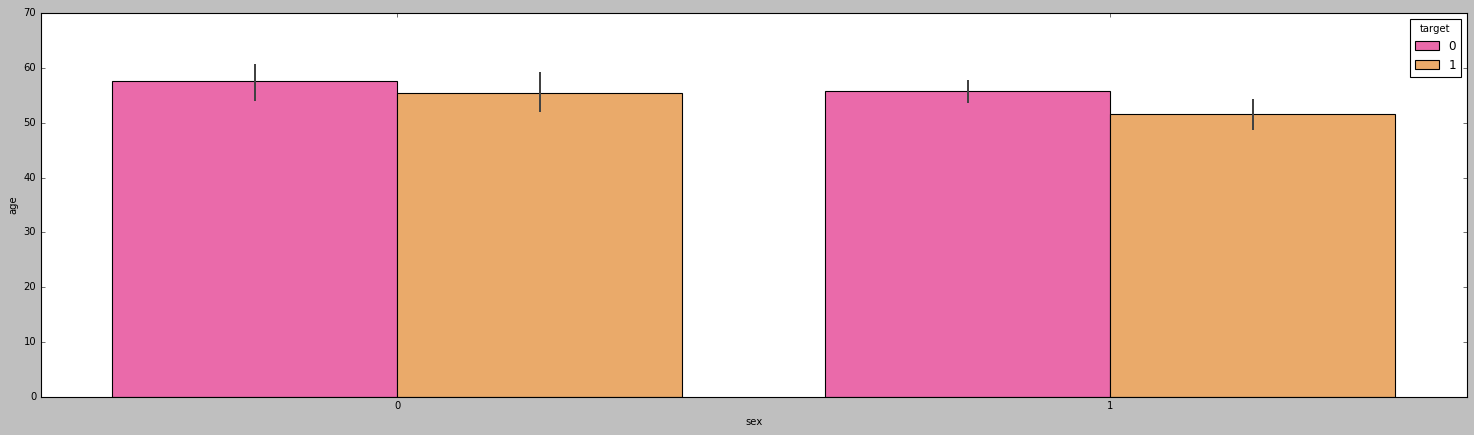

In [147]:
#Plotting the barplot
plt.figure(figsize=(23,6))
sns.barplot(data=df_heart_disease_cleaned_2, x='sex', y='age', hue='target', palette='spring');

The below bar chart indicates that those suffering from the chest pain of atypical angina, and typical angina are more likely to have heart problems. So we considered **chest pain (cp)** as another important feature for our model.

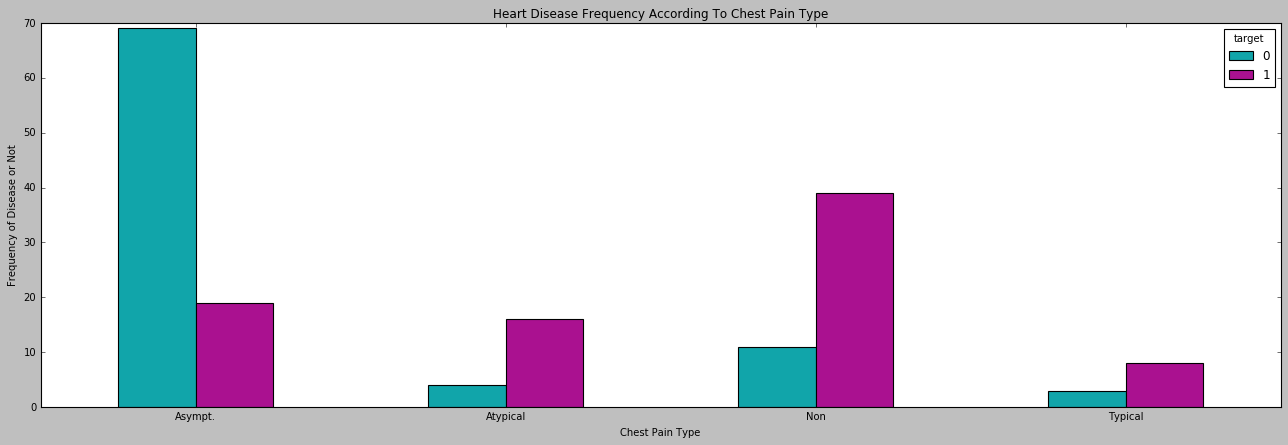

In [149]:
# Distribution of Chest Pain Type
pd.crosstab(df_heart_disease_cleaned_3.cp,
            df_heart_disease_cleaned_3.target).plot(kind="bar",figsize=(20,6),color=['#11A5AA','#AA1190' ]);
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

Another feature that we have selected for our model is **Slope**. As can be seen below the flat slope is more prominent indicator of patients having the heart disease than up or down slope.

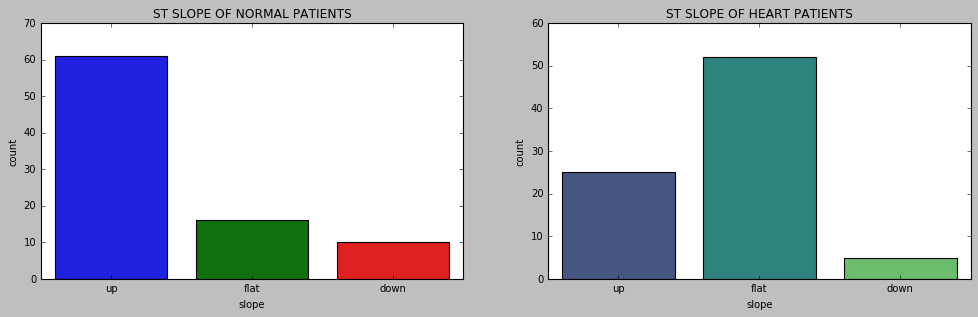

In [151]:
# plotting normal patients
fig = plt.figure(figsize=(15,4))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(df_0['slope'])
plt.title('ST SLOPE OF NORMAL PATIENTS', fontsize=11)

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(df_1['slope'], palette='viridis')
plt.title('ST SLOPE OF HEART PATIENTS', fontsize=11)
plt.show()

Finally, to select the last feature for our model we plotted a correlation heatmap showing the correlation values between different features in the heart disease dataset. It is interesting to note that there is a **positive correlation (0.41)** between **thalach** (thalium stress test result) and our target variable in the dataset. Therefore, the subset of features that we selected for the heart disease dataset is **"Age"**, **"Sex"**, **"CP"**, **"Slope"**, and **"Thalach"**.

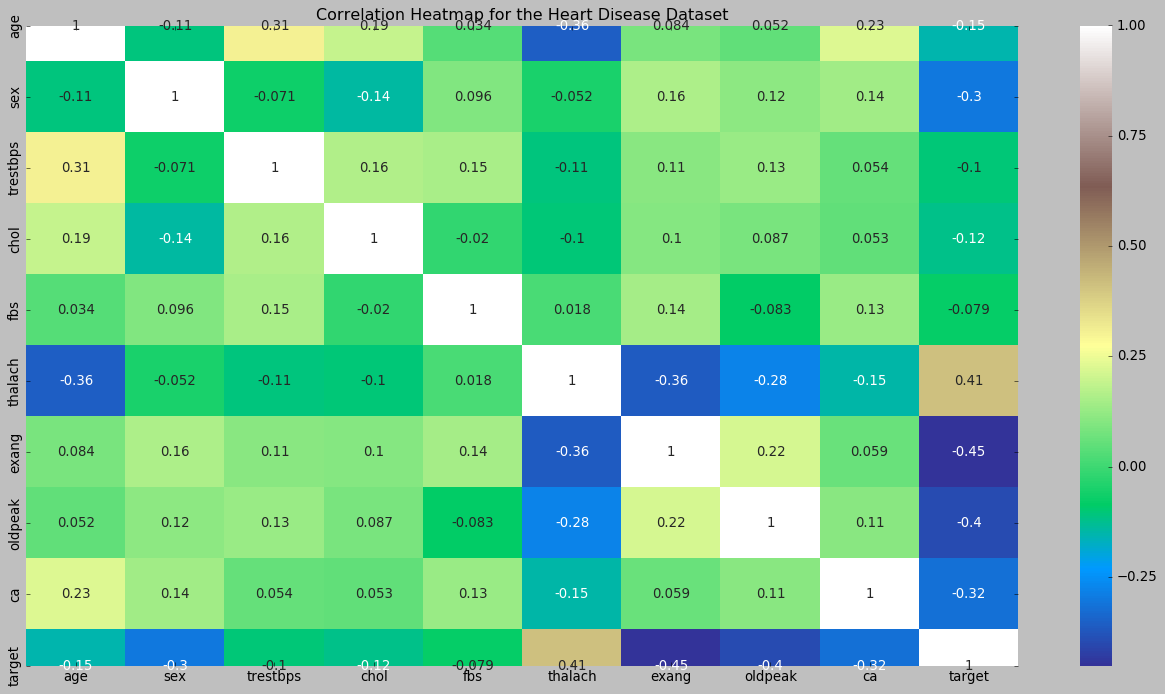

In [169]:
#Find the correlation in the heart disease dataset
plt.figure(figsize=(20,10))
sns.heatmap(df_heart_disease_cleaned_3.corr(), annot=True, cmap='terrain');
plt.title('Correlation Heatmap for the Heart Disease Dataset');

# Mean, Variance, Skew, and Kurtosis Calculation


Skewness greater than +1 or less than –1 is an indication of a substantially skewed distribution, and for kurtosis the values greater than +1 indicate that the distribution is too peaked. On the contrast, the values less than -1 is showing that the distribution is flat. One important point to be considered is that median is a better measure of central tendency than mean for those skewed distributions.

For the heart disease dataset the **skewness** of all the features except for the fbs, oldpeak and ca falls into the acceptable range showing that the data is not that much skewed from the normal distribution. However, the high positive skewness values for fbs, oldpeak and ca indicates that their distribution is skewed to the right which can also be perceived by looking at their mean greater than their median. In terms of **kurtosis** the negative values less than -1 for sex, and exang indicate that there are some extreme values in the data, and positive values greater than 1 for fbs, and oldpeak show that their distribution is too peaked. Moreover, large standard deviation for trestbps, chol, and thalach indicates that the values are far from their mean value and the dispersion is high.

In [50]:
#Display stats about heart disease data
df_heart_disease_cleaned_2.describe().loc[['mean', 'std', '50%']]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
mean,54.692771,0.698795,0.921687,132.239115,243.483834,0.126506,0.572289,147.239914,0.385542,1.318775,1.331325,0.789157,1.819277,0.493976
std,9.188046,0.460170,1.038594,17.783705,44.500006,0.333425,0.542902,21.673184,0.488196,1.066783,0.616820,1.077653,0.803697,0.501476
50%,56.000000,1.000000,0.000000,130.038827,243.171751,0.000000,1.000000,147.599773,0.000000,1.285378,1.000000,0.000000,2.000000,0.000000


In [51]:
#Display the skewness of the heart disease data
df_heart_disease_cleaned_3.skew()

age        -0.198340
sex        -0.840815
trestbps    0.638763
chol        0.329344
fbs         2.298501
thalach    -0.311631
exang       0.478600
oldpeak     1.139004
ca          1.233463
target      0.059729
dtype: float64

In [52]:
#Display the kurtosis of the heart disease data
df_heart_disease_cleaned_3.kurtosis()

age        -0.422420
sex        -1.308660
trestbps    0.318050
chol        0.567370
fbs         3.322287
thalach    -0.238991
exang      -1.792295
oldpeak     1.597119
ca          0.518062
target     -2.020486
dtype: float64

# Histogram of the Features

For this part we first grouped our features based on their types including **categorical** and **binary** variables, and then plotted their histograms with regard to the target variable. As plotting histogram for numerical features does not seem logical we only plotted a stacked histogram for the age variable to determine the number of present and absent heart disease cases visually.

## Categorical Counts

In the below histograms it can be seen that individuals with heart disease are;
-More likely to present atypical angina, and typical angina.
-Less likely to present asymptomatic angina.
-More likely to present with flat slope.
-Less likely to present with up and down slope.
-More likely to preset with a fixed defect.
-Less likely to present with a normal result on the thalium test.

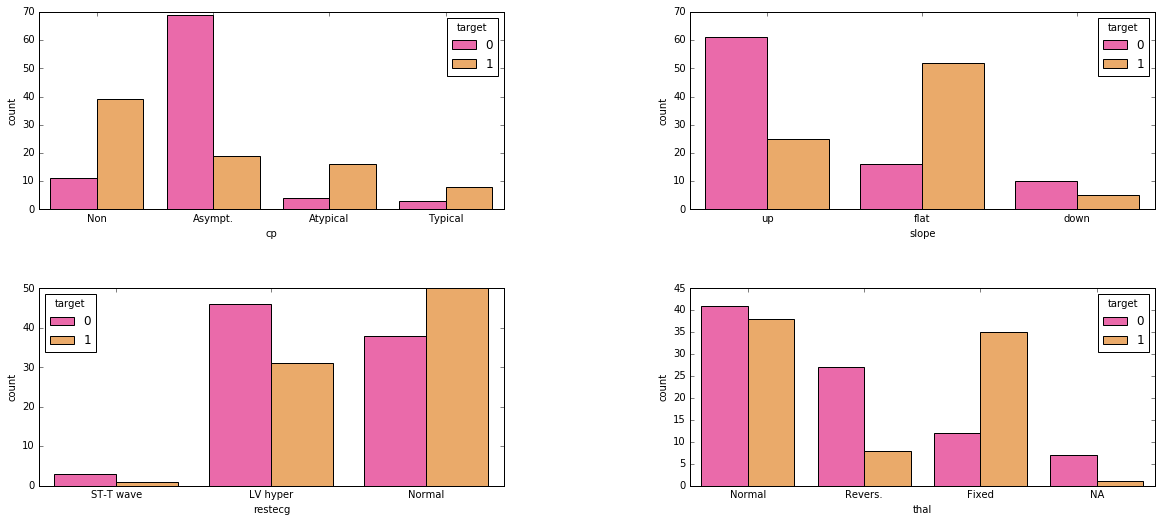

In [66]:
# Plot histogram for categorical variables
cats = ['cp', 'slope', 'restecg', 'thal']
fig = plt.figure(figsize=(20, 7))
fig.subplots_adjust(hspace=0.4, wspace=0.4, bottom=0.01, top=0.95)
for i, var in enumerate(cats):
    i = i + 1
    ax = fig.add_subplot(2, 2, i)
    ax.set_xticklabels(ax.get_xticklabels())
    sns.countplot(data = df_heart_disease_cleaned_3, x = var, hue = 'target', ax = ax, palette='spring')
plt.show()

## Binary Counts

In the below histograms it can be seen that individuals with heart disease are;

More likely to be male.
Less likely to present with fbs <= 120 mg/dl.
Less likely to experience exercise-induced angina.

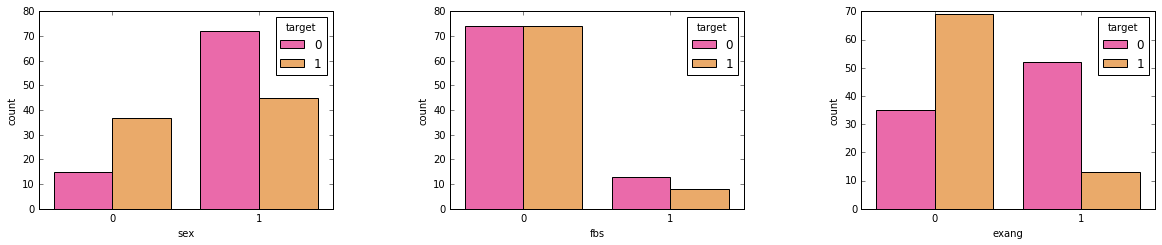

In [67]:
# Plot histogram for binary variables
bins = ['sex', 'fbs', 'exang']
fig = plt.figure(figsize=(20, 7))
fig.subplots_adjust(hspace=0.4, wspace=0.4, bottom=0.01, top=0.95)

for i, var in enumerate(bins):
    i = i + 1
    ax = fig.add_subplot(2, 3, i)
    sns.countplot(data = df_heart_disease_cleaned_3, x = var, hue = 'target', ax = ax, palette='spring')

plt.show()

From the below figure it can be seen that most people who are suffering are of the age 51, 52, and 64. So, people belonging to the age group 50+ are more likely to suffer from the heart disease.

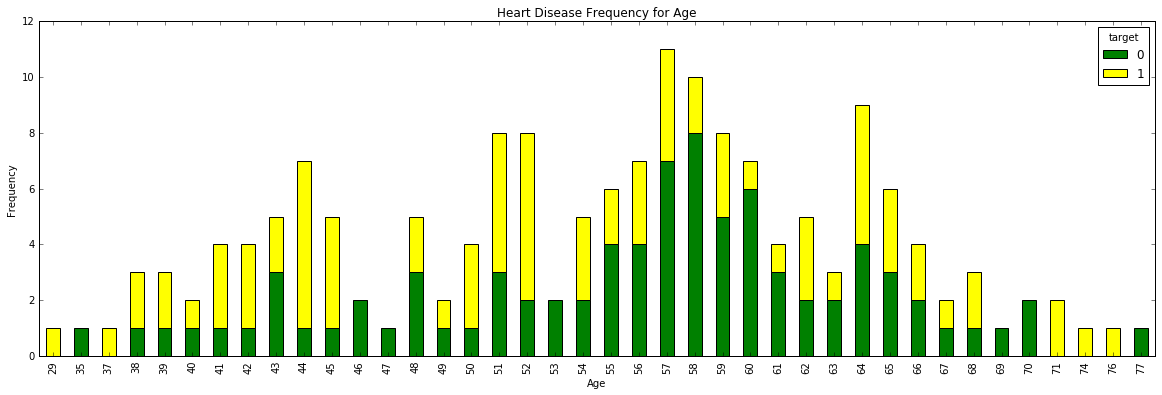

In [68]:
#Creating the cross tables
gen = pd.crosstab(df_heart_disease_cleaned_2['age'], df_heart_disease_cleaned_2['target'])

#stacked plot
gen.plot(kind='bar', stacked=True, color=['green', 'yellow'], grid=False, figsize=(20,6));
plt.title('Heart Disease Frequency for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# kNN

## subset of features

In [110]:
df_heart_disease_cleaned_2_training = df_heart_disease_cleaned_2[['age', 'sex', 'cp', 'slope', 'thalach','target']]

In [111]:
def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df=pd.concat([df, dummies], axis=1)
        df=df.drop(column, axis=1)
    return df

In [112]:
df_heart_disease = df_heart_disease_cleaned_2_training
nominal_features = ['cp', 'slope']
df_heart_disease = onehot_encode(df_heart_disease, dict(zip(nominal_features, ['CP','SL'])))
df_heart_disease.head()

,age,sex,thalach,target,CP_0,CP_1,CP_2,CP_3,SL_0,SL_1,SL_2
0,76,0,115.952071,1,0,0,1,0,0,1,0
1,43,0,135.970028,0,1,0,0,0,0,1,0
3,51,1,143.049207,1,0,0,1,0,0,1,0
4,57,1,143.099327,0,1,0,0,0,0,1,0
6,63,0,171.840974,1,0,0,1,0,0,0,1


In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = df_heart_disease.drop('target',axis=1,inplace=False)
y = df_heart_disease['target']

# divide the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=275)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=275)

In [114]:
# default accuracy
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.6764705882352942

In [115]:
# find optimal k
klist = [1,5,10,15,20,25,30,35]
ka=np.zeros((8,3))

for x in range(len(klist)):
    knn = KNeighborsClassifier(n_neighbors=klist[x])
    knn.fit(X_train, y_train)
    ka[x,0] = klist[x]
    ka[x,1] = knn.score(X_val, y_val)
    ka[x,2] = knn.score(X_train, y_train)
    
ka

array([[ 1.        ,  0.54545455,  1.        ],
       [ 5.        ,  0.63636364,  0.72727273],
       [10.        ,  0.57575758,  0.71717172],
       [15.        ,  0.60606061,  0.68686869],
       [20.        ,  0.60606061,  0.67676768],
       [25.        ,  0.60606061,  0.67676768],
       [30.        ,  0.63636364,  0.68686869],
       [35.        ,  0.6969697 ,  0.64646465]])

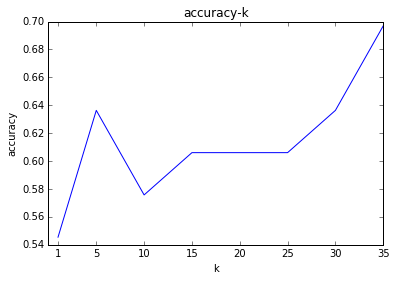

In [116]:
import matplotlib.pyplot as plt

plt.title('accuracy-k')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(ka[:,0], ka[:,1])
plt.xticks([1,5,10,15,20,25,30,35]);

**k=35 is the optimum for the heart disease dataset with sub features.** Next we would like to see how things go with all features of the heart disease dataset.

## all features

In [133]:
df_heart_disease_all = df_heart_disease_cleaned_2
nominal_features = ['cp','restecg','slope','ca','thal']
df_heart_disease_all = onehot_encode(df_heart_disease_all, dict(zip(nominal_features, ['CP','RES','SL','CA','THAL'])))
df_heart_disease_all.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,CP_0,...,SL_2,CA_0,CA_1,CA_2,CA_3,CA_4,THAL_0,THAL_1,THAL_2,THAL_3
0,76,0,140.102822,197.105970,0,115.952071,0,1.284822,1,0,...,0,1,0,0,0,0,0,0,1,0
1,43,0,132.079599,341.049462,1,135.970028,1,3.110483,0,1,...,0,1,0,0,0,0,0,0,0,1
3,51,1,99.934001,243.171751,0,143.049207,1,1.195082,1,0,...,0,1,0,0,0,0,0,0,1,0
4,57,1,110.103508,334.952353,0,143.099327,1,3.082052,0,1,...,0,0,1,0,0,0,0,0,1,0
6,63,0,134.926653,252.023252,0,171.840974,0,0.106792,1,0,...,1,1,0,0,0,0,0,1,0,0


In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = df_heart_disease_all.drop('target',axis=1,inplace=False)
y = df_heart_disease_all['target']

# divide the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=275)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=275)

In [135]:
# default accuracy
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.6470588235294118

In [136]:
# find optimal k
klist = [1,5,10,15,20,25,30,35]
ka=np.zeros((8,3))

for x in range(len(klist)):
    knn = KNeighborsClassifier(n_neighbors=klist[x])
    knn.fit(X_train, y_train)
    ka[x,0] = klist[x]
    ka[x,1] = knn.score(X_val, y_val)
    ka[x,2] = knn.score(X_train, y_train)
    
ka

array([[ 1.        ,  0.66666667,  1.        ],
       [ 5.        ,  0.66666667,  0.68686869],
       [10.        ,  0.51515152,  0.63636364],
       [15.        ,  0.60606061,  0.5959596 ],
       [20.        ,  0.60606061,  0.65656566],
       [25.        ,  0.66666667,  0.61616162],
       [30.        ,  0.63636364,  0.63636364],
       [35.        ,  0.57575758,  0.5959596 ]])

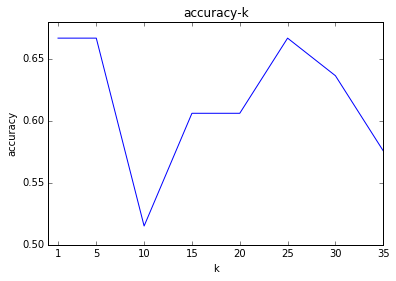

In [137]:
import matplotlib.pyplot as plt

plt.title('accuracy-k')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(ka[:,0], ka[:,1])
plt.xticks([1,5,10,15,20,25,30,35]);

**The accuracy on the validation set reaches the maximum when k=1,5,25. However, considering the problem of overfitting and underfitting, when k=1, there is the  problem of overfitting, and when k=25, there seems to be the problem of underfitting. So k=5 is the optimum for the heart disease dataset with all features.**

# Report the accuracy, AUC, f-score of kNN classifier before and after normalization and weighted-kNN


## subset of features
### before normalization and weighted-kNN

In [117]:
# optimal k=35
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score
optimal_n=35
knn_optimal = KNeighborsClassifier(n_neighbors = optimal_n)
knn_optimal.fit(X_train,y_train)
pred_op = knn_optimal.predict(X_test)
acc_op = accuracy_score(y_test,pred_op)
auc_op = roc_auc_score(y_test,pred_op)
f_op = f1_score(y_test,pred_op)
print("when k=35, the accuracy is "+str(acc_op))
print("when k=35, the auc score is "+str(auc_op))
print("when k=35, the f1 score is "+str(f_op))

when k=35, the accuracy is 0.5882352941176471
when k=35, the auc score is 0.6175438596491228
when k=35, the f1 score is 0.5


**When k=35, the performance metrics on test set are:\
accuracy: 0.59; AUC score: 0.62 ; f-score: 0.50**
### ROC curve

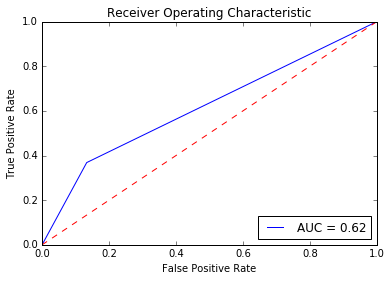

In [118]:
# ROC curve
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_op)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### after normalization and weighted-kNN
**Standardization**

In [119]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
st_scaler = preprocessing.StandardScaler()
X_train_st_scaled = st_scaler.fit_transform(X_train)
X_val_st_scaled = st_scaler.fit_transform(X_val)
X_test_st_scaled = st_scaler.fit_transform(X_test)

In [120]:
# find optimal k
klist = [1,5,10,15,20,25,30,35]
ka=np.zeros((8,3))

for x in range(len(klist)):
    knn = KNeighborsClassifier(n_neighbors=klist[x])
    knn.fit(X_train_st_scaled, y_train)
    ka[x,0] = klist[x]
    ka[x,1] = knn.score(X_val_st_scaled, y_val)
    ka[x,2] = knn.score(X_train_st_scaled, y_train)
    
ka

array([[ 1.        ,  0.6969697 ,  1.        ],
       [ 5.        ,  0.78787879,  0.80808081],
       [10.        ,  0.66666667,  0.7979798 ],
       [15.        ,  0.66666667,  0.78787879],
       [20.        ,  0.66666667,  0.78787879],
       [25.        ,  0.63636364,  0.77777778],
       [30.        ,  0.63636364,  0.80808081],
       [35.        ,  0.66666667,  0.80808081]])

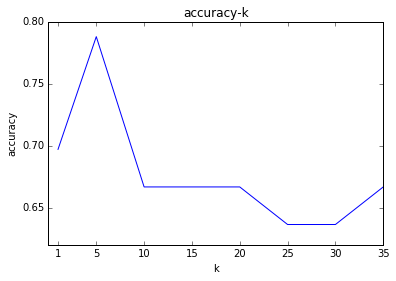

In [121]:
import matplotlib.pyplot as plt

plt.title('accuracy-k')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(ka[:,0], ka[:,1])
plt.xticks([1,5,10,15,20,25,30,35]);

**Optimal k is k=5 for standardization.**\
\
**Min-Maximization**

In [122]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = preprocessing.MinMaxScaler()
X_train_minmax_scaled = minmax_scaler.fit_transform(X_train)
X_val_minmax_scaled = minmax_scaler.fit_transform(X_val)
X_test_minmax_scaled = minmax_scaler.fit_transform(X_test)

In [123]:
# find optimal k
klist = [1,5,10,15,20,25,30,35]
ka=np.zeros((8,3))

for x in range(len(klist)):
    knn = KNeighborsClassifier(n_neighbors=klist[x])
    knn.fit(X_train_minmax_scaled, y_train)
    ka[x,0] = klist[x]
    ka[x,1] = knn.score(X_val_minmax_scaled, y_val)
    ka[x,2] = knn.score(X_train_minmax_scaled, y_train)
    
ka

array([[ 1.        ,  0.72727273,  1.        ],
       [ 5.        ,  0.78787879,  0.82828283],
       [10.        ,  0.6969697 ,  0.7979798 ],
       [15.        ,  0.6969697 ,  0.80808081],
       [20.        ,  0.6969697 ,  0.81818182],
       [25.        ,  0.72727273,  0.78787879],
       [30.        ,  0.72727273,  0.7979798 ],
       [35.        ,  0.66666667,  0.81818182]])

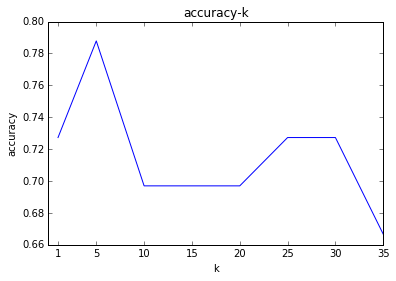

In [124]:
import matplotlib.pyplot as plt

plt.title('accuracy-k')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(ka[:,0], ka[:,1])
plt.xticks([1,5,10,15,20,25,30,35]);

**Optimal k is k=5 for min-maximization.**\
\
**Weighted-kNN under Standardization**

In [127]:
k=5
knn = KNeighborsClassifier(n_neighbors = k,weights='uniform')
knn.fit(X_train_st_scaled,y_train)
pred = knn.predict(X_val_st_scaled)
acc = accuracy_score(y_val,pred)
auc = roc_auc_score(y_val,pred)
pre = precision_score(y_val,pred)
recall = recall_score(y_val,pred)
f = f1_score(y_val,pred)
print("when k=5, using standardization & uniform weights, the validation accuracy score is "+str(acc))
print("when k=5, using standardization & uniform weights, the validation auc score is "+str(auc))
print("when k=5, using standardization & uniform weights, the validation precision score is "+str(pre))
print("when k=5, using standardization & uniform weights, the validation recall score is "+str(recall))
print("when k=5, using standardization & uniform weights, the validation f1 score is "+str(f))

when k=5, using standardization & uniform weights, the validation accuracy score is 0.7878787878787878
when k=5, using standardization & uniform weights, the validation auc score is 0.806390977443609
when k=5, using standardization & uniform weights, the validation precision score is 0.9285714285714286
when k=5, using standardization & uniform weights, the validation recall score is 0.6842105263157895
when k=5, using standardization & uniform weights, the validation f1 score is 0.7878787878787878


In [128]:
k=5
knn = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn.fit(X_train_st_scaled,y_train)
pred = knn.predict(X_val_st_scaled)
acc = accuracy_score(y_val,pred)
auc = roc_auc_score(y_val,pred)
pre = precision_score(y_val,pred)
recall = recall_score(y_val,pred)
f = f1_score(y_val,pred)
print("when k=5, using standardization & distance-based weights, the validation accuracy score is "+str(acc))
print("when k=5, using standardization & distance-based weights, the validation auc score is "+str(auc))
print("when k=5, using standardization & distance-based weights, the validation precision score is "+str(pre))
print("when k=5, using standardization & distance-based weights, the validation recall score is "+str(recall))
print("when k=5, using standardization & distance-based weights, the validation f1 score is "+str(f))

when k=5, using standardization & distance-based weights, the validation accuracy score is 0.8181818181818182
when k=5, using standardization & distance-based weights, the validation auc score is 0.8327067669172933
when k=5, using standardization & distance-based weights, the validation precision score is 0.9333333333333333
when k=5, using standardization & distance-based weights, the validation recall score is 0.7368421052631579
when k=5, using standardization & distance-based weights, the validation f1 score is 0.8235294117647058


**Weighted-kNN under Min-maximization**

In [129]:
k=5
knn = KNeighborsClassifier(n_neighbors = k,weights='uniform')
knn.fit(X_train_minmax_scaled,y_train)
pred = knn.predict(X_val_minmax_scaled)
acc = accuracy_score(y_val,pred)
auc = roc_auc_score(y_val,pred)
pre = precision_score(y_val,pred)
recall = recall_score(y_val,pred)
f = f1_score(y_val,pred)
print("when k=5, using min-maxization & uniform weights, the validation accuracy score is "+str(acc))
print("when k=5, using min-maxization & uniform weights, the validation auc score is "+str(auc))
print("when k=5, using min-maxization & uniform weights, the validation precision score is "+str(pre))
print("when k=5, using min-maxization & uniform weights, the validation recall score is "+str(recall))
print("when k=5, using min-maxization & uniform weights, the validation f1 score is "+str(f))

when k=5, using min-maxization & uniform weights, the validation accuracy score is 0.7878787878787878
when k=5, using min-maxization & uniform weights, the validation auc score is 0.806390977443609
when k=5, using min-maxization & uniform weights, the validation precision score is 0.9285714285714286
when k=5, using min-maxization & uniform weights, the validation recall score is 0.6842105263157895
when k=5, using min-maxization & uniform weights, the validation f1 score is 0.7878787878787878


In [130]:
k=5
knn = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn.fit(X_train_minmax_scaled,y_train)
pred = knn.predict(X_val_minmax_scaled)
acc = accuracy_score(y_val,pred)
auc = roc_auc_score(y_val,pred)
pre = precision_score(y_val,pred)
recall = recall_score(y_val,pred)
f = f1_score(y_val,pred)
print("when k=5, using min-maxization & distance-based weights, the validation accuracy score is "+str(acc))
print("when k=5, using min-maxization & distance-based weights, the validation auc score is "+str(auc))
print("when k=5, using min-maxization & distance-based weights, the validation precision score is "+str(pre))
print("when k=5, using min-maxization & distance-based weights, the validation recall score is "+str(recall))
print("when k=5, using min-maxization & distance-based weights, the validation f1 score is "+str(f))

when k=5, using min-maxization & distance-based weights, the validation accuracy score is 0.7878787878787878
when k=5, using min-maxization & distance-based weights, the validation auc score is 0.806390977443609
when k=5, using min-maxization & distance-based weights, the validation precision score is 0.9285714285714286
when k=5, using min-maxization & distance-based weights, the validation recall score is 0.6842105263157895
when k=5, using min-maxization & distance-based weights, the validation f1 score is 0.7878787878787878


In [131]:
optimal_n=5
knn_optimal = KNeighborsClassifier(n_neighbors = optimal_n,weights='distance')
knn_optimal.fit(X_train_st_scaled,y_train)
pred_op = knn_optimal.predict(X_test_st_scaled)
acc_op = accuracy_score(y_test,pred_op)
auc_op = roc_auc_score(y_test,pred_op)
f_op = f1_score(y_test,pred_op)
print("when k=5, using standardization and distance-based weights, the test accuracy is "+str(acc_op))
print("when k=5, using standardization and distance-based weights, the test auc score is "+str(auc_op))
print("when k=5, using standardization and distance-based weights, the test f1 score is "+str(f_op))

when k=5, using standardization and distance-based weights, the test accuracy is 0.7647058823529411
when k=5, using standardization and distance-based weights, the test auc score is 0.775438596491228
when k=5, using standardization and distance-based weights, the test f1 score is 0.7647058823529413


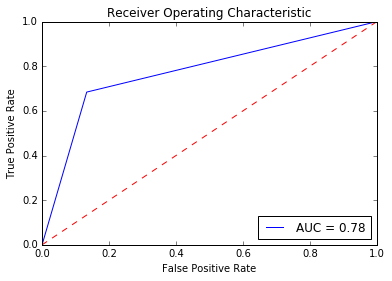

In [132]:
# ROC curve
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_op)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Based on the above, using standardization and distance-based weights increase the accuracy most, with k=5.\
**The performance metrics on test set are: accuracy: 0.76; AUC score: 0.78; f-score: 0.76**, which is better than the orignal data model.

## all features
### before normalization and weighted-kNN

In [139]:
# optimal k=5
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score
optimal_n=5
knn_optimal = KNeighborsClassifier(n_neighbors = optimal_n)
knn_optimal.fit(X_train,y_train)
pred_op = knn_optimal.predict(X_test)
acc_op = accuracy_score(y_test,pred_op)
auc_op = roc_auc_score(y_test,pred_op)
f_op = f1_score(y_test,pred_op)
print("when k=5, the accuracy is "+str(acc_op))
print("when k=5, the auc score is "+str(auc_op))
print("when k=5, the f1 score is "+str(f_op))

when k=5, the accuracy is 0.6470588235294118
when k=5, the auc score is 0.6631578947368422
when k=5, the f1 score is 0.625


**When k=5, the performance metrics on test set are:\
accuracy: 0.65; AUC score: 0.66 ; f-score: 0.625**
### ROC curve

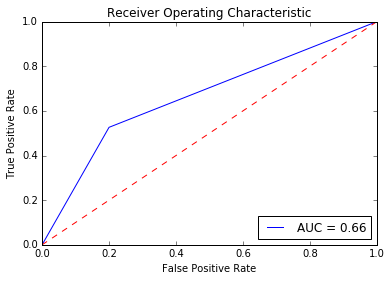

In [140]:
# ROC curve
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_op)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### after normalization and weighted-kNN
**Standardization**

In [141]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
st_scaler = preprocessing.StandardScaler()
X_train_st_scaled = st_scaler.fit_transform(X_train)
X_val_st_scaled = st_scaler.fit_transform(X_val)
X_test_st_scaled = st_scaler.fit_transform(X_test)

In [142]:
# find optimal k
klist = [1,5,10,15,20,25,30,35]
ka=np.zeros((8,3))

for x in range(len(klist)):
    knn = KNeighborsClassifier(n_neighbors=klist[x])
    knn.fit(X_train_st_scaled, y_train)
    ka[x,0] = klist[x]
    ka[x,1] = knn.score(X_val_st_scaled, y_val)
    ka[x,2] = knn.score(X_train_st_scaled, y_train)
    
ka

array([[ 1.        ,  0.81818182,  1.        ],
       [ 5.        ,  0.75757576,  0.87878788],
       [10.        ,  0.6969697 ,  0.80808081],
       [15.        ,  0.81818182,  0.84848485],
       [20.        ,  0.75757576,  0.82828283],
       [25.        ,  0.78787879,  0.85858586],
       [30.        ,  0.72727273,  0.85858586],
       [35.        ,  0.75757576,  0.85858586]])

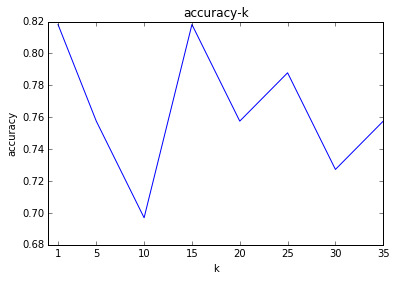

In [143]:
import matplotlib.pyplot as plt

plt.title('accuracy-k')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(ka[:,0], ka[:,1])
plt.xticks([1,5,10,15,20,25,30,35]);

**Optimal k is k=15 for standardization.**\
\
**Min-Maximization**

In [144]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = preprocessing.MinMaxScaler()
X_train_minmax_scaled = minmax_scaler.fit_transform(X_train)
X_val_minmax_scaled = minmax_scaler.fit_transform(X_val)
X_test_minmax_scaled = minmax_scaler.fit_transform(X_test)

In [145]:
# find optimal k
klist = [1,5,10,15,20,25,30,35]
ka=np.zeros((8,3))

for x in range(len(klist)):
    knn = KNeighborsClassifier(n_neighbors=klist[x])
    knn.fit(X_train_minmax_scaled, y_train)
    ka[x,0] = klist[x]
    ka[x,1] = knn.score(X_val_minmax_scaled, y_val)
    ka[x,2] = knn.score(X_train_minmax_scaled, y_train)
    
ka

array([[ 1.        ,  0.81818182,  1.        ],
       [ 5.        ,  0.84848485,  0.8989899 ],
       [10.        ,  0.78787879,  0.81818182],
       [15.        ,  0.75757576,  0.82828283],
       [20.        ,  0.81818182,  0.86868687],
       [25.        ,  0.87878788,  0.85858586],
       [30.        ,  0.84848485,  0.82828283],
       [35.        ,  0.84848485,  0.85858586]])

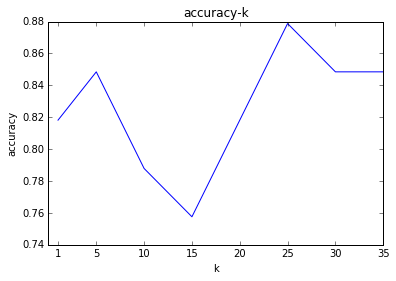

In [146]:
import matplotlib.pyplot as plt

plt.title('accuracy-k')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(ka[:,0], ka[:,1])
plt.xticks([1,5,10,15,20,25,30,35]);

**Optimal k is k=25 for min-maximization.**\
\
**Weighted-kNN under Standardization**

In [147]:
k=15
knn = KNeighborsClassifier(n_neighbors = k,weights='uniform')
knn.fit(X_train_st_scaled,y_train)
pred = knn.predict(X_val_st_scaled)
acc = accuracy_score(y_val,pred)
auc = roc_auc_score(y_val,pred)
pre = precision_score(y_val,pred)
recall = recall_score(y_val,pred)
f = f1_score(y_val,pred)
print("when k=15, using standardization & uniform weights, the validation accuracy score is "+str(acc))
print("when k=15, using standardization & uniform weights, the validation auc score is "+str(auc))
print("when k=15, using standardization & uniform weights, the validation precision score is "+str(pre))
print("when k=15, using standardization & uniform weights, the validation recall score is "+str(recall))
print("when k=15, using standardization & uniform weights, the validation f1 score is "+str(f))

when k=15, using standardization & uniform weights, the validation accuracy score is 0.8181818181818182
when k=15, using standardization & uniform weights, the validation auc score is 0.8327067669172933
when k=15, using standardization & uniform weights, the validation precision score is 0.9333333333333333
when k=15, using standardization & uniform weights, the validation recall score is 0.7368421052631579
when k=15, using standardization & uniform weights, the validation f1 score is 0.8235294117647058


In [148]:
k=15
knn = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn.fit(X_train_st_scaled,y_train)
pred = knn.predict(X_val_st_scaled)
acc = accuracy_score(y_val,pred)
auc = roc_auc_score(y_val,pred)
pre = precision_score(y_val,pred)
recall = recall_score(y_val,pred)
f = f1_score(y_val,pred)
print("when k=15, using standardization & distance-based weights, the validation accuracy score is "+str(acc))
print("when k=15, using standardization & distance-based weights, the validation auc score is "+str(auc))
print("when k=15, using standardization & distance-based weights, the validation precision score is "+str(pre))
print("when k=15, using standardization & distance-based weights, the validation recall score is "+str(recall))
print("when k=15, using standardization & distance-based weights, the validation f1 score is "+str(f))

when k=15, using standardization & distance-based weights, the validation accuracy score is 0.8181818181818182
when k=15, using standardization & distance-based weights, the validation auc score is 0.8327067669172933
when k=15, using standardization & distance-based weights, the validation precision score is 0.9333333333333333
when k=15, using standardization & distance-based weights, the validation recall score is 0.7368421052631579
when k=15, using standardization & distance-based weights, the validation f1 score is 0.8235294117647058


**Weighted-kNN under Min-maximization**

In [149]:
k=25
knn = KNeighborsClassifier(n_neighbors = k,weights='uniform')
knn.fit(X_train_minmax_scaled,y_train)
pred = knn.predict(X_val_minmax_scaled)
acc = accuracy_score(y_val,pred)
auc = roc_auc_score(y_val,pred)
pre = precision_score(y_val,pred)
recall = recall_score(y_val,pred)
f = f1_score(y_val,pred)
print("when k=25, using min-maxization & uniform weights, the validation accuracy score is "+str(acc))
print("when k=25, using min-maxization & uniform weights, the validation auc score is "+str(auc))
print("when k=25, using min-maxization & uniform weights, the validation precision score is "+str(pre))
print("when k=25, using min-maxization & uniform weights, the validation recall score is "+str(recall))
print("when k=25, using min-maxization & uniform weights, the validation f1 score is "+str(f))

when k=25, using min-maxization & uniform weights, the validation accuracy score is 0.8787878787878788
when k=25, using min-maxization & uniform weights, the validation auc score is 0.8853383458646616
when k=25, using min-maxization & uniform weights, the validation precision score is 0.9411764705882353
when k=25, using min-maxization & uniform weights, the validation recall score is 0.8421052631578947
when k=25, using min-maxization & uniform weights, the validation f1 score is 0.8888888888888888


In [150]:
k=25
knn = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn.fit(X_train_minmax_scaled,y_train)
pred = knn.predict(X_val_minmax_scaled)
acc = accuracy_score(y_val,pred)
auc = roc_auc_score(y_val,pred)
pre = precision_score(y_val,pred)
recall = recall_score(y_val,pred)
f = f1_score(y_val,pred)
print("when k=25, using min-maxization & distance-based weights, the validation accuracy score is "+str(acc))
print("when k=25, using min-maxization & distance-based weights, the validation auc score is "+str(auc))
print("when k=25, using min-maxization & distance-based weights, the validation precision score is "+str(pre))
print("when k=25, using min-maxization & distance-based weights, the validation recall score is "+str(recall))
print("when k=25, using min-maxization & distance-based weights, the validation f1 score is "+str(f))

when k=25, using min-maxization & distance-based weights, the validation accuracy score is 0.8484848484848485
when k=25, using min-maxization & distance-based weights, the validation auc score is 0.8590225563909775
when k=25, using min-maxization & distance-based weights, the validation precision score is 0.9375
when k=25, using min-maxization & distance-based weights, the validation recall score is 0.7894736842105263
when k=25, using min-maxization & distance-based weights, the validation f1 score is 0.8571428571428572


In [151]:
optimal_n=25
knn_optimal = KNeighborsClassifier(n_neighbors = optimal_n,weights='distance')
knn_optimal.fit(X_train_minmax_scaled,y_train)
pred_op = knn_optimal.predict(X_test_minmax_scaled)
acc_op = accuracy_score(y_test,pred_op)
auc_op = roc_auc_score(y_test,pred_op)
f_op = f1_score(y_test,pred_op)
print("when k=25, using min-maxization & uniform weights, the test accuracy is "+str(acc_op))
print("when k=25, using min-maxization & uniform weights, the test auc score is "+str(auc_op))
print("when k=25, using min-maxization & uniform weights, the test f1 score is "+str(f_op))

when k=25, using min-maxization & uniform weights, the test accuracy is 0.8823529411764706
when k=25, using min-maxization & uniform weights, the test auc score is 0.887719298245614
when k=25, using min-maxization & uniform weights, the test f1 score is 0.8888888888888888


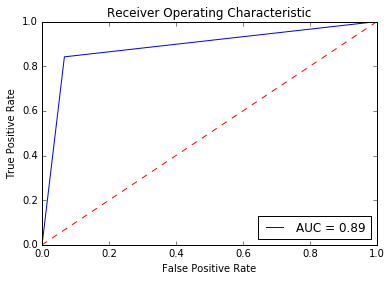

In [152]:
# ROC curve
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_op)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Based on the above, using min-maxization & uniform weights increase the accuracy most, with k=25.\
**The performance metrics on test set are: accuracy: 0.88; AUC score: 0.89; f-score: 0.89**, which is better than the orignal data model.